In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data\legislatures_clean.csv')
df = df.drop(columns=['Unnamed: 0'])
df.set_index('State',inplace = True)
df['cbrt_pop'] = round(df['population']**(1/3),0)
df
df_nonebraska = df.drop('Nebraska',axis=0)
df_nowierds = df_nonebraska.drop(['California','New Hampshire'],axis=0)
df.head()

,population,senate_seats,rep_seats,pop_per_senator,pop_per_rep,total_seats,pop_per_legislator,pres_dem,pres_rep,leg_dem,leg_rep,total_diff,Abbreviation,Latitude,Longitude,cbrt_pop
State,,,,,,,,,,,,,,,,
California,37253956.0,40.0,80.0,931349.0,465674.0,120.0,310450.0,61.73,31.62,0.750000,0.250000,0.165800,CA,36.116203,-119.681564,334.0
Texas,25145561.0,31.0,150.0,811147.0,167637.0,181.0,138926.0,43.24,52.23,0.441989,0.558011,0.027444,TX,31.054487,-97.563461,293.0
New York,19378102.0,63.0,150.0,307589.0,129187.0,213.0,90977.0,59.01,36.52,0.685446,0.309859,0.123016,NY,42.165726,-74.948051,269.0
Florida,18801310.0,40.0,120.0,470033.0,156678.0,160.0,117508.0,47.82,49.02,0.400000,0.600000,0.133100,FL,27.766279,-81.686783,266.0
Illinois,12830632.0,59.0,118.0,217468.0,108734.0,177.0,72489.0,55.83,38.76,0.644068,0.355932,0.101602,IL,40.349457,-88.986137,234.0


In [3]:
df.describe()

,population,senate_seats,rep_seats,pop_per_senator,pop_per_rep,total_seats,pop_per_legislator,pres_dem,pres_rep,leg_dem,leg_rep,total_diff,Latitude,Longitude,cbrt_pop
count,5.000000e+01,50.000000,50.000000,50.000000,49.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.162876e+06,39.440000,108.220000,154399.960000,59676.959184,147.660000,42357.120000,43.778600,49.241200,0.455640,0.518315,0.145005,39.476170,-93.665631,165.100000
std,6.848235e+06,10.565945,57.740196,175369.954026,71033.278561,60.200892,48356.801441,10.347708,10.220058,0.201731,0.205848,0.112267,6.130621,19.341408,56.212153
min,5.636260e+05,20.000000,0.000000,14310.000000,3291.000000,49.000000,3105.000000,21.630000,30.030000,0.000000,0.000000,0.027444,21.094318,-157.498337,83.000000
25%,1.833004e+06,33.000000,75.000000,54434.000000,22825.000000,112.250000,17112.750000,35.825000,41.180000,0.319697,0.375336,0.076381,35.659511,-103.929331,122.250000
50%,4.436370e+06,38.000000,100.000000,115217.000000,40923.000000,142.500000,31077.500000,45.905000,48.845000,0.434328,0.552535,0.131793,39.999729,-89.647602,164.500000
75%,6.680312e+06,47.750000,124.750000,187068.750000,68618.000000,176.250000,49674.500000,49.985000,57.660000,0.610747,0.652627,0.171758,43.183955,-80.091066,188.500000
max,3.725396e+07,67.000000,400.000000,931349.000000,465674.000000,424.000000,310450.000000,62.220000,68.500000,0.921053,0.855556,0.630750,61.370716,-69.381927,334.000000


In [4]:
#correlations 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_nowierds['population'],df_nowierds['total_seats'])

r_squared = round(r_value**2,3)
print('Population vs. Total Seats')
print('r-squared: ',r_squared)
print('slope: ','{:f}'.format(slope))
print('intercept: ',round(intercept,0))
print('p-value: ',round(p_value,3))

Population vs. Total Seats
r-squared:  0.226
slope:  0.000004
intercept:  122.0
p-value:  0.001


C:\Users\kverhoff\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


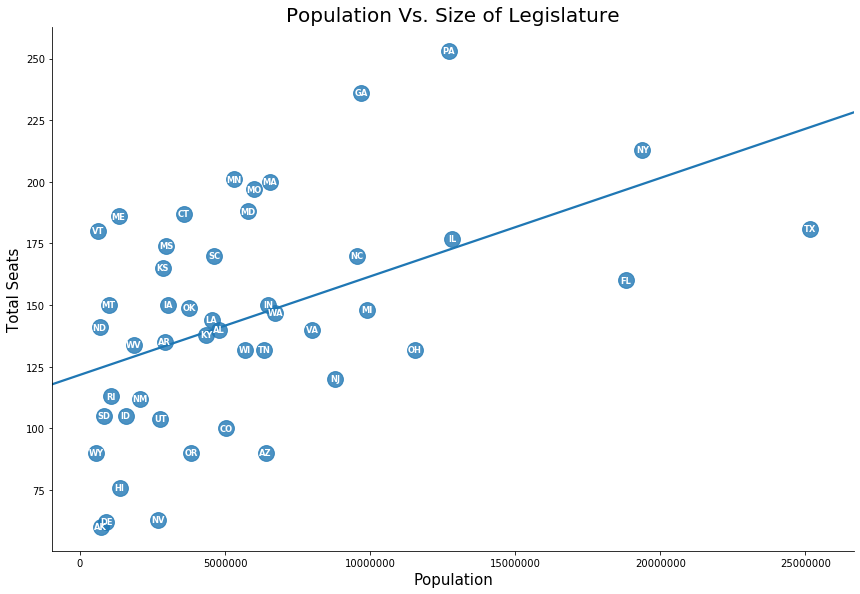

In [5]:
#scatter - no wierd states
#fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
ax = sns.lmplot(x='population', 
                y='total_seats',
                data=df_nowierds,
                fit_reg=True,
                markers="o", 
                scatter_kws={'s':250},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0
                )

plt.title('Population Vs. Size of Legislature',size=20)
plt.xlabel('Population',size=15)
plt.ylabel('Total Seats',size=15)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
for index, row in df_nowierds.iterrows():
    pop = row['population']
    seats = row['total_seats']
    state = row['Abbreviation']
    plt.text(pop,seats,state, horizontalalignment='center', verticalalignment='center', size='small', color='white', weight='semibold')

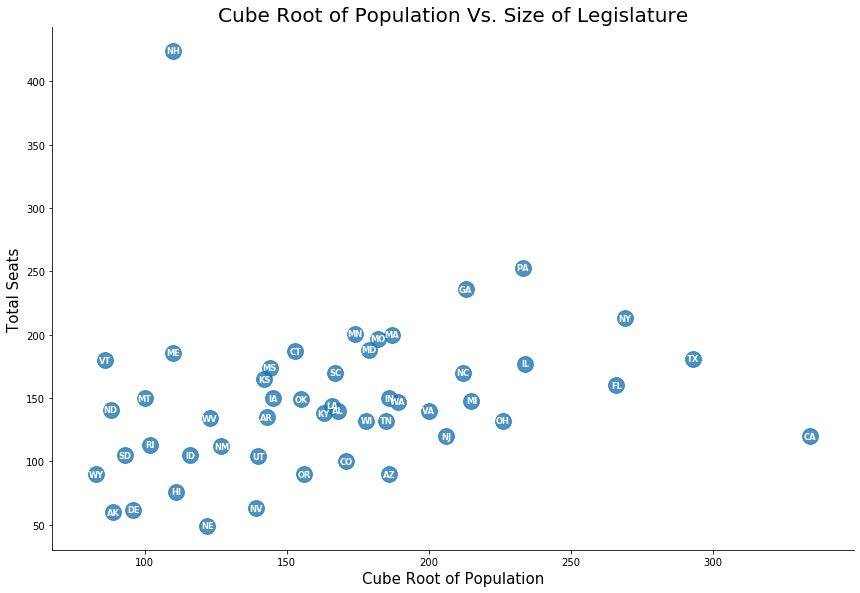

In [6]:
#scatter - cube roots
#fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
ax = sns.lmplot(x='cbrt_pop', 
                y='total_seats',
                data=df,
                fit_reg=False,
                markers="o", 
                scatter_kws={'s':250},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0
                )

plt.title('Cube Root of Population Vs. Size of Legislature',size=20)
plt.xlabel('Cube Root of Population',size=15)
plt.ylabel('Total Seats',size=15)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

for index, row in df.iterrows():
    pop = row['cbrt_pop']
    seats = row['total_seats']
    state = row['Abbreviation']
    plt.text(pop,seats,state, horizontalalignment='center', verticalalignment='center', size='small', color='white', weight='semibold')

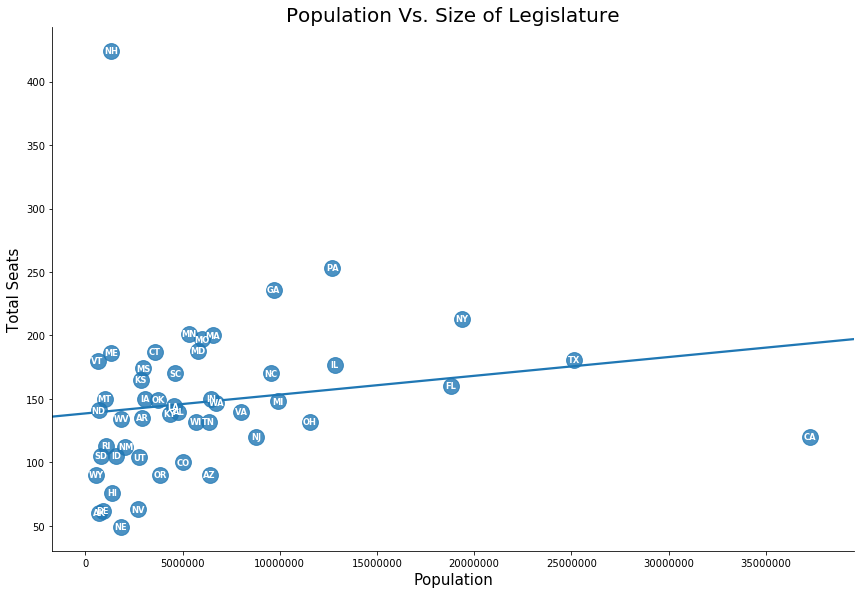

In [7]:
#scatter - all states
#fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
ax = sns.lmplot(x='population', 
                y='total_seats',
                data=df,
                fit_reg=True,
                markers="o", 
                scatter_kws={'s':250},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0
                )

plt.title('Population Vs. Size of Legislature',size=20)
plt.xlabel('Population',size=15)
plt.ylabel('Total Seats',size=15)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
for index, row in df.iterrows():
    pop = row['population']
    seats = row['total_seats']
    state = row['Abbreviation']
    plt.text(pop,seats,state, horizontalalignment='center', verticalalignment='center', size='small', color='white', weight='semibold')

In [8]:
#correlations - seats vs. differential
slope, intercept, r_value, p_value, std_err = stats.linregress(df_nowierds['total_seats'],df_nowierds['total_diff'])

r_squared = round(r_value**2,3)
print('Pres/Leg Differential vs. Total Seats')
print('r-squared: ',r_squared)
print('slope: ','{:f}'.format(slope))
print('intercept: ',round(intercept,0))
print('p-value: ',round(p_value,3))

Pres/Leg Differential vs. Total Seats
r-squared:  0.109
slope:  -0.000673
intercept:  0.0
p-value:  0.024


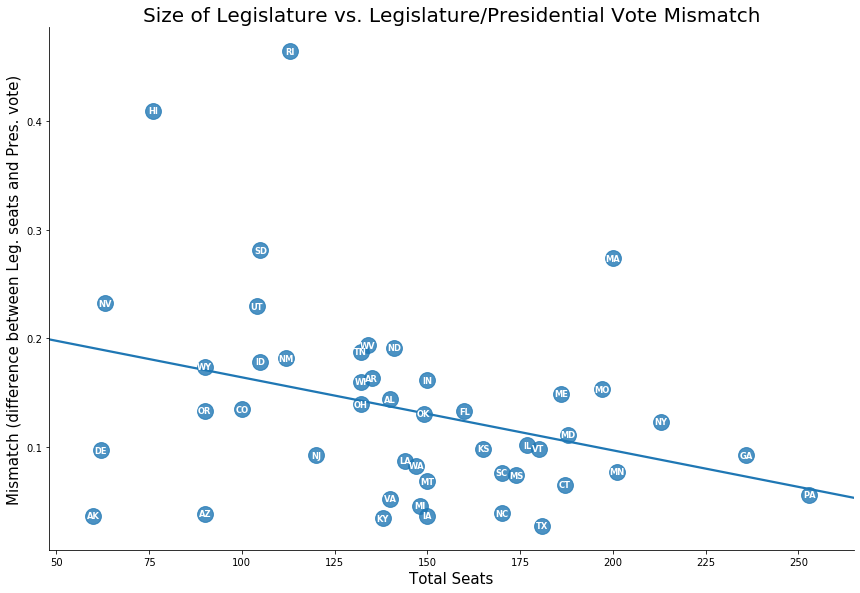

In [9]:
#scatter - seats vs. differential
ax = sns.lmplot(x='total_seats', 
                y='total_diff',
                data=df_nowierds,
                fit_reg=True,
                markers="o", 
                scatter_kws={'s':250},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0
                )

plt.title('Size of Legislature vs. Legislature/Presidential Vote Mismatch',size=20)
plt.xlabel('Total Seats',size=15)
plt.ylabel('Mismatch (difference between Leg. seats and Pres. vote)',size=15)
for index, row in df_nowierds.iterrows():
    mismatch = row['total_diff']
    seats = row['total_seats']
    state = row['Abbreviation']
    plt.text(seats,mismatch,state, horizontalalignment='center', verticalalignment='center', size='small', color='white', weight='semibold')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

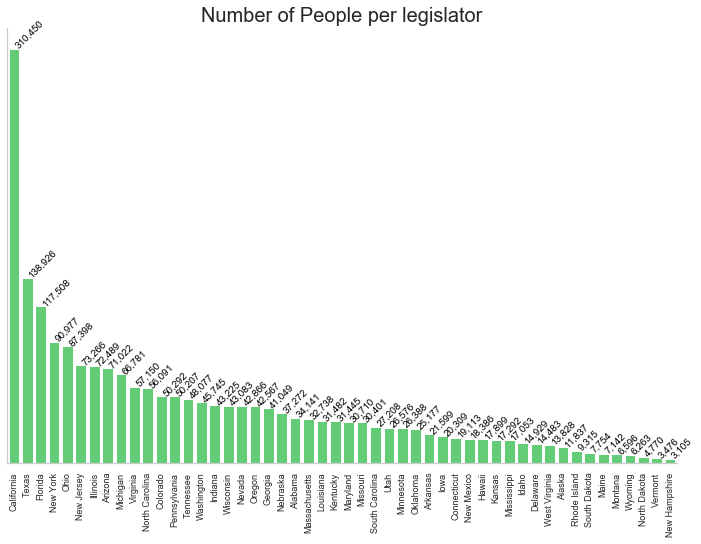

In [10]:
#bar chart - biggest to smallest by representation

df = df.sort_values(['pop_per_legislator'], ascending=[0])
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax = sns.barplot(x=df.index, 
                 y="pop_per_legislator", 
                 data=df,
                 color='#53DD6C'
                 )
i=0
for index, row in df.iterrows():
    y = row['pop_per_legislator']
    x = i
    text = int(round(row['pop_per_legislator'],0))
    plt.text(x,
             y,
             f"{text:,d}", 
             horizontalalignment='left', 
             #verticalalignment='top', 
             size='small', 
             color='black', 
             weight='ultralight',
             rotation=45
            )
    i = i+1

sns.despine()
plt.title('Number of People per legislator',size=20)
plt.xlabel('',size=15)
plt.ylabel('# of People per Legislator',size=15)
ax.axes.get_yaxis().set_visible(False)
plt.xticks(rotation=90, size=9)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

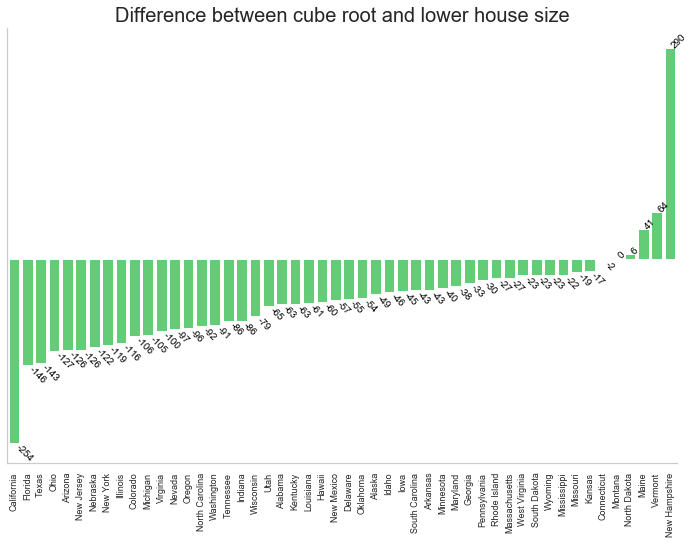

In [11]:
#bar chart - biggest to smallest by representation
df['cb_root_diff'] = df['rep_seats'] - df['cbrt_pop']
df = df.sort_values(['cb_root_diff'], ascending=[1])
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax = sns.barplot(x=df.index, 
                 y="cb_root_diff", 
                 data=df,
                 color='#53DD6C'
                 )
i=0
for index, row in df.iterrows():
    y = row['cb_root_diff']
    x = i
    text = int(round(row['cb_root_diff'],0))
    if y < 0:
        plt.text(x,
                 y,
                 f"{text:,d}", 
                 horizontalalignment='left', 
                 verticalalignment='top', 
                 size='small', 
                 color='black', 
                 weight='ultralight',
                 rotation=-45
                )
    elif y >= 0:
        plt.text(x,
                 y,
                 f"{text:,d}", 
                 horizontalalignment='left', 
                 #verticalalignment='top', 
                 size='small', 
                 color='black', 
                 weight='ultralight',
                 rotation=45
                )
    i = i+1

sns.despine()
plt.title('Difference between cube root and lower house size',size=20)
plt.xlabel('',size=15)
plt.ylabel('Difference',size=15)
ax.axes.get_yaxis().set_visible(False)
plt.xticks(rotation=90, size=9)

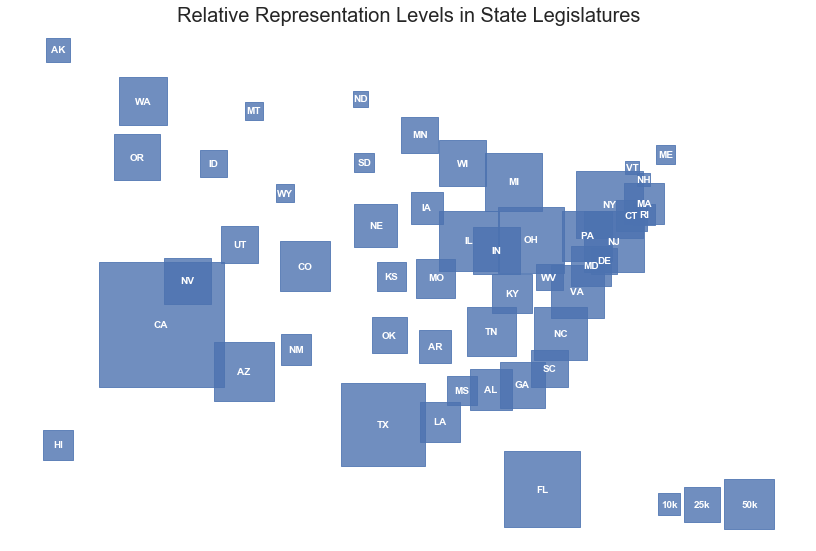

In [12]:
#map
df.at['Alaska','Longitude'] = -130
df.at['Alaska','Latitude'] = 50 
df.at['Hawaii','Longitude'] = -130
df.at['Hawaii','Latitude'] = 30
df.loc['10,000 per legislator'] = [0, 0, 0, 0, 0, 0, 10000.0, 0, 0, 0, 0, 0, '10k', 27, -69.0, 0, 0]
df.loc['25,000 per legislator'] = [0, 0, 0, 0, 0, 0, 25000.0, 0, 0, 0, 0, 0, '25k', 27, -65.75, 0, 0]
df.loc['50,000 per legislator'] = [0, 0, 0, 0, 0, 0, 50000.0, 0, 0, 0, 0, 0, '50k', 27, -61.0, 0, 0]

sns.set(style="whitegrid")
ax = sns.lmplot(x='Longitude', 
                y='Latitude',
                data=df,
                fit_reg=False,
                markers="s", 
                scatter_kws={'s':df['pop_per_legislator']/20},
                height=8,
                aspect=1.5,
                legend=False,
                ci=0,   
                )
plt.grid(False)
sns.despine(left=True,bottom=True)
plt.ylabel('')    
plt.xlabel('')
plt.xticks([])
plt.yticks([])
plt.ylim(25)

plt.title('Relative Representation Levels in State Legislatures',size=20)

for index, row in df.iterrows():
    y = row['Latitude']
    x = row['Longitude']
    state = row['Abbreviation']
    plt.text(x,y,state, horizontalalignment='center', verticalalignment='center', size='small', color='white', weight='semibold')